In [1]:
import originpro as op
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
from numpy.fft import fft, fftshift

In [12]:
#filename ='010421CWUP.026.txt'
path = r'D:\random\THz-TDS\PolarisationStateExperiment\MAY21\transmission'
file = '190521_013.x'
originfilename = 'SRR9_10_B_python'

#wafer1_THz_DIR07_LR_2
#wafer2_HR01

file_start = 0
file_end = 19

ref_file = 12
file2 = '190521.xxx'
path2 = r'D:\random\THz-TDS\PolarisationStateExperiment\MAY21'

delaystart = 8000 
delayend = 18000
intpoints = 2048

n_file = file_end-file_start+1

In [13]:
def findchar(s, ch):
    return [i for i, ltr in enumerate(s) if ltr == ch]

'''def filename_generator(file_start,nfile,fname,path):
    findex = findchar(fname, "x")[:-1]
    prefilename = fname[:findex[0]]
    postfilename = fname[findex[1]+2:]
    filename=[]
    for i in range(nfile):
        i=i+file_start

        if i<10:
            temp_name = prefilename  + f'00%i'%i + postfilename
        elif i>=100:
            temp_name = prefilename  + f'%i'%i + postfilename
        else:
            temp_name = prefilename  + f'0%i'%i + postfilename
        filename.append(path + '\\' + temp_name)
        #print(temp_name)
    return filename'''

def filename_generator(file_start,nfile,fname,path):
    #findex = findchar(fname, "x")[:-1]
    findex = findchar(fname, "x")
    prefilename = fname[:findex[0]]
    #postfilename = fname[findex[1]+2:]
    filename=[]
    for i in range(nfile):
        i=i+file_start
        temp_name = prefilename  + f'%i'%i
#        if i<10:
#            temp_name = prefilename  + f'00%i'%i + postfilename
#        elif i>=100:
#            temp_name = prefilename  + f'%i'%i + postfilename
#        else:
#            temp_name = prefilename  + f'0%i'%i + postfilename
        filename.append(path + '\\' + temp_name)
        #print(temp_name)
    return filename

def filename_generator2(file_start,nfile,fname,path):
    findex = findchar(fname, "x")[:-1]
    #findex = findchar(fname, "x")
    prefilename = fname[:findex[0]]
    postfilename = fname[findex[1]+2:]
    filename=[]
    for i in range(nfile):
        i=i+file_start
        #temp_name = prefilename  + f'%i'%i
        if i<10:
            temp_name = prefilename  + f'00%i'%i + postfilename
        elif i>=100:
            temp_name = prefilename  + f'%i'%i + postfilename
        else:
            temp_name = prefilename  + f'0%i'%i + postfilename
        filename.append(path + '\\' + temp_name)
    return filename

def readfile(filename):
    import pandas as pd
    import numpy as np
    
    df = pd.read_csv(filename,skiprows=12,sep='\s+').iloc[:-1,:5]
    #df = pd.read_csv(filename,skiprows=13,sep='\s+').iloc[:-1,:5]
    #df = pd.read_csv(filename, skiprows=13,sep='\t')
    df=pd.DataFrame(np.array(df, dtype=float))
    index=["Distance (um)", "Delay (ps)", "Signal (V)", "Phase (deg)", "Rcos (theta)"]
    df=df.set_axis(index, axis=1, inplace=False).reset_index(drop=True)
    return df

def readfile2(filename):
    import pandas as pd
    import numpy as np
    
    df = pd.read_csv(filename,skiprows=12,sep='\s+').iloc[:-1,:5]
    #df = pd.read_csv(filename,skiprows=13,sep='\s+').iloc[:-1,:5]
    #df = pd.read_csv(filename, skiprows=13,sep='\t')
    df=pd.DataFrame(np.array(df, dtype=float))
    index=["Distance (um)", "Delay (ps)", "Signal (V)", "Phase (deg)", "Rcos (theta)"]
    df=df.set_axis(index, axis=1, inplace=False).reset_index(drop=True)
    return df

def plot_amplitude(fft_freq, fft_ampsample, xmin, xmax, ymin, ymax, i):
    #plt.close()
    #plt.close()
    
    #plt.plot(fft_freq, fft_ampref, label='Reference',markersize=5)
    plt.plot(fft_freq, fft_ampsample, label='Sample_'+str(i),markersize=5)
    plt.yscale('log')
    plt.xlim(xmin,xmax)   #0 to 3THz
    plt.ylim(ymin,ymax)
    plt.grid(which = 'major',color='black', linestyle='-', linewidth=0.5, alpha = 0.4)
    plt.grid(which = 'minor',color='lightgray', linestyle='--', linewidth=1, alpha = 0.4)
    plt.xlabel('Frequency (THz)')
    plt.ylabel('Amplitude (a.u.)')
    plt.title('FFT Amplitude')
    plt.legend(loc='upper right')
    #plt.show()
    
def time2freq(filenames,i):
    #This function reads time data, performs interpolation and converts it to frequency amplitude and phase
    timedata        = readfile(filenames)
    int_timedata    = np.interp(int_delay,timedata.to_numpy()[:,1],timedata.to_numpy()[:,4]).reshape(intpoints)
    fft_amp         = abs(fftshift(fft(int_timedata)))[int(intpoints/2):]                   #Amplitude Axis
    #Normalisation
    #fft_amp = fft_amp/max(fft_amp)
    fft_phase       = np.unwrap(np.angle((fftshift(fft(int_timedata)))[int(intpoints/2):])) #Phase axis
    plot_amplitude(fft_freq, fft_amp, 0, 3, 1e-3, 10, i)
    
    return int_timedata, fft_amp, fft_phase

def time2freq2(filenames,i):
    #This function reads time data, performs interpolation and converts it to frequency amplitude and phase
    timedata        = readfile2(filenames)
    int_timedata    = np.interp(int_delay,timedata.to_numpy()[:,1],timedata.to_numpy()[:,4]).reshape(intpoints)
    fft_amp         = abs(fftshift(fft(int_timedata)))[int(intpoints/2):]                   #Amplitude Axis
    #Normalisation
    #fft_amp = fft_amp/max(fft_amp)
    fft_phase       = np.unwrap(np.angle((fftshift(fft(int_timedata)))[int(intpoints/2):])) #Phase axis
    plot_amplitude(fft_freq, fft_amp, 0, 3, 1e-3, 10, i)
    
    return int_timedata, fft_amp, fft_phase

def origincommentgenerator():
    intdelaystr = []
    ampstr = []
    phasestr = []
    transstr = []
    for i in range(n_file):
        intdelaystr.append('Intdelay_'+str(i+file_start))
        ampstr.append('Amp_'+str(i+file_start))
        phasestr.append('Phase_'+str(i+file_start))
        transstr.append('Trans_'+str(i+file_start))
    return intdelaystr, ampstr, phasestr, transstr

In [14]:
import sys
def origin_shutdown_exception_hook(exctype, value, traceback):
    '''Ensures Origin gets shut down if an uncaught exception'''
    op.exit()
    sys.__excepthook__(exctype, value, traceback)
if op and op.oext:
    sys.excepthook = origin_shutdown_exception_hook

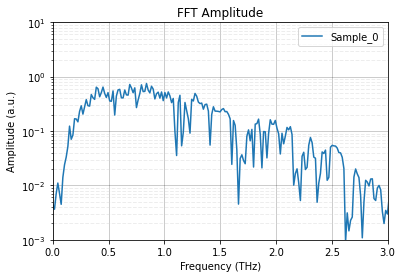

In [15]:
filename    = filename_generator(file_start, n_file,file,path)
#Change
#ref_filename = filename_generator(ref_file, 1,file2,path2)
ref_filename = filename_generator2(ref_file, 1,file2,path2)
#ref_filename = ref_file
#print(ref_filename)

#Interpolated Delay Axis
delaytotal = (delayend-delaystart)/149.89623                     #delaytotal in terahertz
delaydelta = (delaytotal)/(intpoints-1)                          #delaydelta in terahertz
int_delay  = np.arange(0,intpoints)*delaydelta+delaystart/149.89623
fft_freq   = np.arange(0,intpoints/2,1)/delaytotal

#Change
#Reference frequency
delay_ref, fft_ampref, fft_phaseref = time2freq2(ref_filename[0],0)
#delay_ref, fft_ampref, fft_phaseref = time2freq(ref_filename[0],0)

#comment generator
intdelaystr, ampstr, phasestr, transstr = origincommentgenerator()

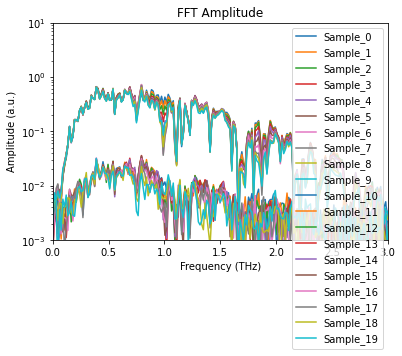

In [16]:
plt.close()
delay = []
fft_amplitude = []
fft_phase = []
trans = []

for i in range(n_file):
    #Sample
    delay_temp, fft_amptemp, fft_phasetemp = time2freq(filename[i],i)
    
    
    delay.append(delay_temp)
    fft_amplitude.append(fft_amptemp)
    fft_phase.append(fft_phasetemp)
    trans.append(fft_amptemp/fft_ampref)

In [17]:
interpolated = op.new_sheet(lname='Int_Delay')
amplitude    = op.new_sheet(lname='FFTAmplitude')
phase        = op.new_sheet(lname='FFTPhase')
transmission = op.new_sheet(lname='Transmission')

for i in range(n_file):
    
    #raw = op.new_sheet(lname=file[:6]+'_'+filename[i][-3:])
    raw = op.new_sheet(lname=file[:10]+'_'+filename[i][-2:])
    sample = readfile(filename[i])
    
    #comment = 'Sample'+'_'+filenames[i][-3:]
    comment = 'Sample'+'_'+str(int(filename[i][-1:])*10)
    
    raw.from_list(0, sample.to_numpy()[:,0], 'Distance',    units = 'um',  comments=comment,axis=None)
    raw.from_list(1, sample.to_numpy()[:,1], 'Delay',       units = 'ps',  comments=comment,axis=None)
    raw.from_list(2, sample.to_numpy()[:,2], 'Signal',      units = 'V',   comments=comment,axis=None)
    raw.from_list(3, sample.to_numpy()[:,3], 'Phase',       units = 'deg', comments=comment,axis=None)
    raw.from_list(4, sample.to_numpy()[:,4], 'Rcos(theta)', units = '',    comments=comment,axis=None)
    
    interpolated.from_list(i+2, delay[i],        'Intdelay',     units = 'V',   comments='Delay'+'_'+str(int(filename[i][-1:])*10),axis='Y')
    amplitude.from_list(   i+2, fft_amplitude[i],'Amplitude',    units = 'a.u.',comments='Amp'  +'_'+str(int(filename[i][-1:])*10),axis='Y')
    phase.from_list(       i+2, fft_phase[i],    'Phase',        units = 'deg', comments='phase'+'_'+str(int(filename[i][-1:])*10),axis='Y')
    transmission.from_list(i+1, trans[i],        'Transmission', units = '',    comments='trans'+'_'+filename[i][-3:],axis='Y')

#Change next two lines
raw = op.new_sheet(lname=file2[:6]+'_'+ref_filename[0][-3:])
#raw = op.new_sheet(lname=file2[:10]+'_'+ref_filename[0][-1:])
ref = readfile2(ref_filename[0])
#ref = readfile(ref_filename[0])

raw.from_list(0, ref.to_numpy()[:,0], 'Distance',    units = 'um',  comments='ref'+'_'+ref_filename[0][-3:],axis=None)
raw.from_list(1, ref.to_numpy()[:,1], 'Delay',       units = 'ps',  comments='ref'+'_'+ref_filename[0][-3:],axis=None)
raw.from_list(2, ref.to_numpy()[:,2], 'Signal',      units = 'V',   comments='ref'+'_'+ref_filename[0][-3:],axis=None)
raw.from_list(3, ref.to_numpy()[:,3], 'Phase',       units = 'deg', comments='ref'+'_'+ref_filename[0][-3:],axis=None)
raw.from_list(4, ref.to_numpy()[:,4], 'Rcos(theta)', units = '',    comments='ref'+'_'+ref_filename[0][-3:],axis=None)


interpolated.from_list(1, delay_ref,   'Intdelay',  units = 'V',   comments='RefDelay'+'_'+ref_filename[0][-3:],axis='Y')
amplitude.from_list(   1, fft_ampref,  'Amplitude', units = 'a.u.',comments='RefAmp'  +'_'+ref_filename[0][-3:],axis='Y')
phase.from_list(       1, fft_phaseref,'Phase',     units = 'deg', comments='Refphase'+'_'+ref_filename[0][-3:],axis='Y')

interpolated.from_list(0, int_delay, 'Delay',     units = 'ps' , axis='X')
amplitude.from_list(   0, fft_freq,  'Frequency', units = 'THz', axis='X')
phase.from_list(       0, fft_freq,  'Frequency', units = 'deg', axis='X')
transmission.from_list(0, fft_freq,  'Frequency', units = 'THz', axis='X')



'''d=[]
e=[]
f=[]
e2=[]
for i in range(n_file):
    d.append(fft_freq)
    f.append(int_delay)
    e.append(np.ones(1024)*i*10)
    e2.append(np.ones(2048)*i*10)
    
a = np.array(fft_amplitude).flatten()
b = np.array(delay).flatten()
c = np.array(fft_phase).flatten()
d = np.array(d).flatten()
e = np.array(e).flatten()
e2 = np.array(e2).flatten()
f = np.array(f).flatten()
g = np.array(trans).flatten()


polarfftamp = op.new_sheet(lname='Polar_FFT_Amp')
polarfftphase = op.new_sheet(lname='Polar_FFT_Phase')
polardelay = op.new_sheet(lname='Polar_Delay')
polartrans = op.new_sheet(lname='Polar_Trans')

polarfftamp.from_list(0,   d, 'Frequency',     units = 'THz' , axis='X')
polarfftphase.from_list(0, d, 'Frequency',     units = 'THz' , axis='X')
polartrans.from_list(0,    d, 'Frequency',     units = 'THz' , axis='X')
polardelay.from_list(0,    f, 'Delay',     units = 'ps' , axis='X')

polarfftamp.from_list(1,   e, 'Angle',     units = 'deg' , axis='Y')
polarfftphase.from_list(1, e, 'Angle',     units = 'deg' , axis='Y')
polardelay.from_list(1,    e2, 'Angle',     units = 'deg' , axis='Y')
polartrans.from_list(1,    e, 'Angle',     units = 'deg' , axis='Y')

polarfftamp.from_list(2,   a, 'Amplitude',     units = 'a.u.' ,axis='Z')
polarfftphase.from_list(2, c, 'Phase',         units = 'deg' , axis='Z')
polardelay.from_list(2,    b, 'Amplitude',     units = 'V' ,   axis='Z')
polartrans.from_list(2,    g, 'Amplitude',     units = 'V' ,   axis='Z')
'''
#op.save(os.path.normpath(os.getcwd()) + r'\result.opju')
op.save(os.path.normpath(os.path.normpath(path)) + '\\' + originfilename + '.opju')
op.exit()

In [ ]:
'''#To Make Polar plots

d=[]
e=[]
f=[]
e2=[]
for i in range(37):
    d.append(fft_freq)
    f.append(int_delay)
    e.append(np.ones(1024)*i*10)
    e2.append(np.ones(2048)*i*10)
    
a = np.array(fft_amplitude).flatten()
b = np.array(delay).flatten()
c = np.array(fft_phase).flatten()
d = np.array(d).flatten()
e = np.array(e).flatten()
e2 = np.array(e2).flatten()
f = np.array(f).flatten()


polarfftamp = op.new_sheet(lname='Polar_FFT_Amp')
polarfftphase = op.new_sheet(lname='Polar_FFT_Phase')
polardelay = op.new_sheet(lname='Polar_Delay')

polarfftamp.from_list(0,   d, 'Frequency',     units = 'THz' , axis='X')
polarfftphase.from_list(0, d, 'Frequency',     units = 'THz' , axis='X')
polardelay.from_list(0,    f, 'Delap',     units = 'ps' , axis='X')

polarfftamp.from_list(1,   e, 'Angle',     units = 'deg' , axis='Y')
polarfftphase.from_list(1, e, 'Angle',     units = 'deg' , axis='Y')
polardelay.from_list(1,    e2, 'Angle',     units = 'deg' , axis='Y')

polarfftamp.from_list(2,   a, 'Amplitude',     units = 'a.u.' ,axis='Z')
polarfftphase.from_list(2, c, 'Phase',         units = 'deg' , axis='Z')
polardelay.from_list(2,    b, 'Amplitude',     units = 'V' ,   axis='Z')

op.save(os.path.normpath(os.path.normpath(path)) + '\\' + originfilename + '___.opju')
op.exit()'''